# Análise Cafeteria

#### Essa análise mostra os resultados atingidos em meses anteriores e faz uma previsão (forecast) de vendas futuras


#### Link dos dados:


https://docs.google.com/spreadsheets/d/13NvXZxcNZIbfkXHp0ZaoqYo1odOa2w8idYHxSRrG5l0/edit?usp=sharing


## Vendas Mensais

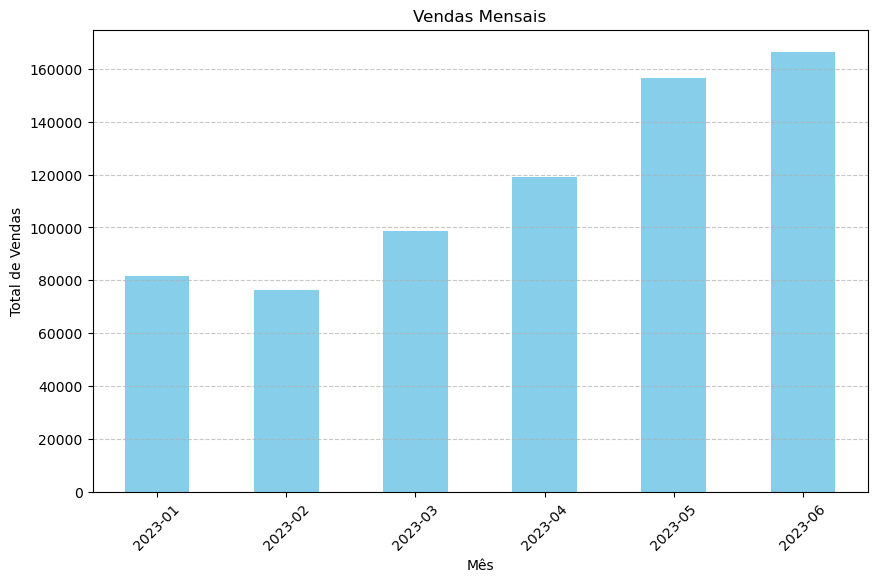

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv("cafe")

# Converter a coluna 'transaction_date' para o tipo datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'], format="%d-%m-%Y")

# Agregar as vendas por mês
monthly_sales = data.groupby(data['transaction_date'].dt.to_period('M'))['Total_Bill'].sum()

# Plotar o gráfico de vendas mensais
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### O gráfico a cima ilustra um crescimento nas vendas mensais, em um período de 6 meses, se iniciando no mês de Janeiro e finalizando em junho

## Vendas por Loja

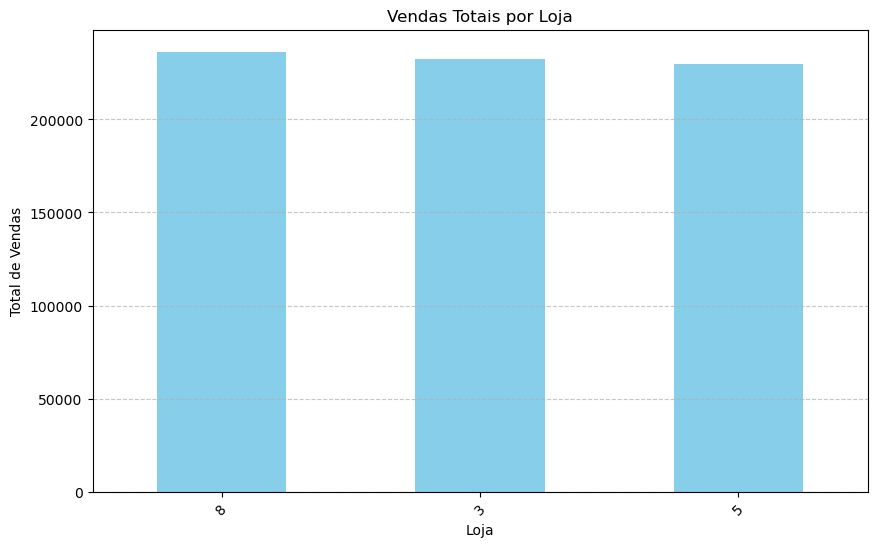

Loja com melhor desempenho: 8
Loja com pior desempenho: 5


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv("cafe")

# Calcular as vendas totais por loja
sales_by_store = data.groupby('store_id')['Total_Bill'].sum()

# Plotar o gráfico de barras para comparar as vendas por loja
plt.figure(figsize=(10, 6))
sales_by_store.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Loja')
plt.xlabel('Loja')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identificar as lojas com melhor e pior desempenho
best_store = sales_by_store.idxmax()
worst_store = sales_by_store.idxmin()

print("Loja com melhor desempenho:", best_store)
print("Loja com pior desempenho:", worst_store)


## Pico de vendas por horário

/var/folders/rk/yyx08shs3kd44v4p9rtsgh000000gn/T/ipykernel_74205/2117162503.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['transaction_time'] = pd.to_datetime(data['transaction_time']).dt.hour


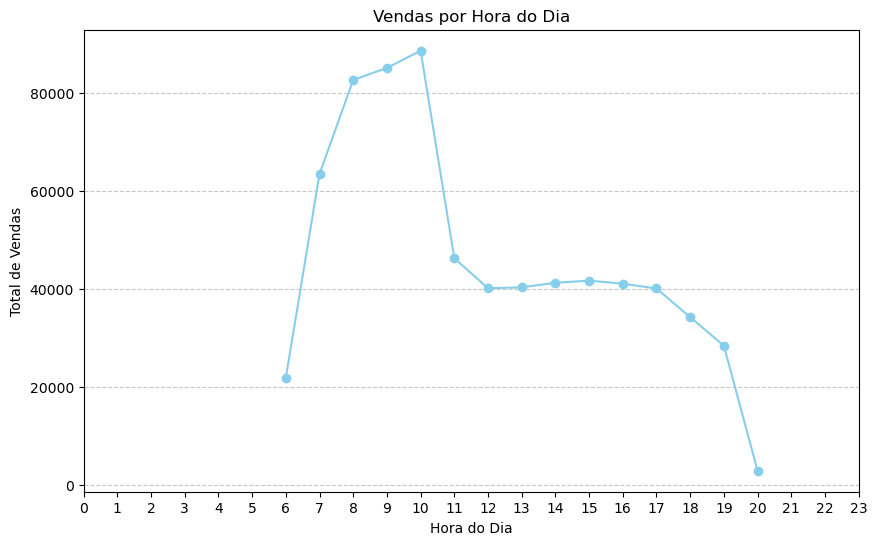

Horário de pico de vendas: 10


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv("cafe")

# Extrair a hora da transação
data['transaction_time'] = pd.to_datetime(data['transaction_time']).dt.hour

# Calcular as vendas totais por hora
sales_by_hour = data.groupby('transaction_time')['Total_Bill'].sum()

# Plotar o gráfico de linha para mostrar as vendas ao longo do dia
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', color='skyblue', marker='o')
plt.title('Vendas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Vendas')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identificar os horários de pico de vendas
peak_hours = sales_by_hour.idxmax()
print("Horário de pico de vendas:", peak_hours)


#### O maior horário de vendas mostra-se que ocorre às 10:00, com um declínio de vendas às 20:00, sendo puxado pelo horário de encerramento da cafeteria

# Forecast de vendas de 7 dias











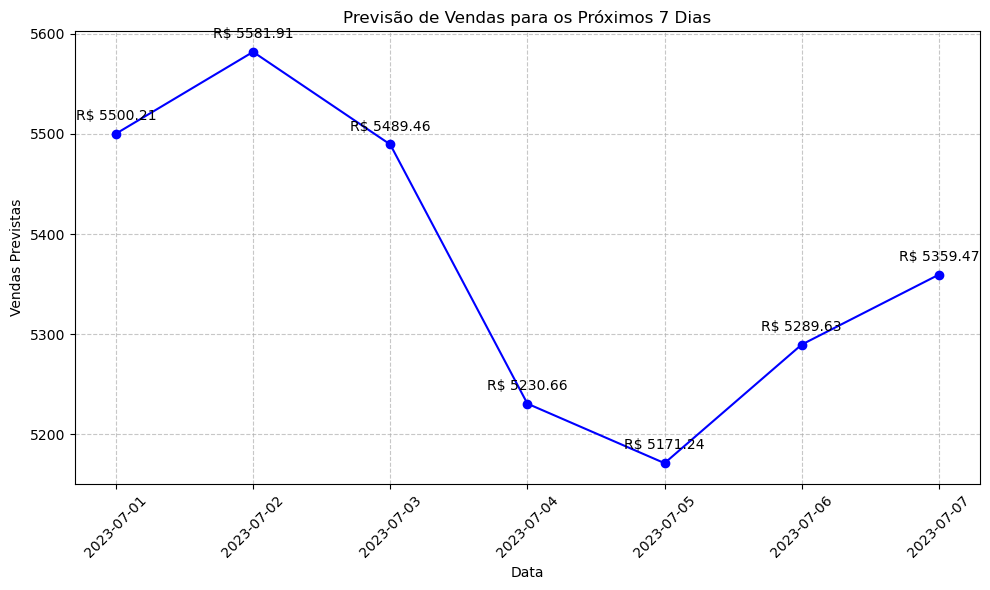

        Data Vendas Previstas
0 2023-07-01       R$ 5500.21
1 2023-07-02       R$ 5581.91
2 2023-07-03       R$ 5489.46
3 2023-07-04       R$ 5230.66
4 2023-07-05       R$ 5171.24
5 2023-07-06       R$ 5289.63
6 2023-07-07       R$ 5359.47


In [34]:
import matplotlib.pyplot as plt

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecast, marker='o', color='blue', linestyle='-')
plt.title('Previsão de Vendas para os Próximos 7 Dias')
plt.xlabel('Data')
plt.ylabel('Vendas Previstas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar os valores previstos no gráfico
for i, txt in enumerate(forecast_str):
    plt.annotate(txt, (forecast_dates[i], forecast[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Exibir o gráfico
plt.show()

# Arredondar os valores previstos para duas casas decimais
forecast_rounded = forecast.round(2)

# Converter os valores previstos para uma lista de strings formatadas
forecast_str = [f'R$ {value:.2f}' for value in forecast_rounded]

# Criar um DataFrame com as datas e as vendas previstas formatadas
forecast_df = pd.DataFrame({'Data': forecast_dates, 'Vendas Previstas': forecast_str})

# Exibir o DataFrame
print(forecast_df)



#### O forecast mostra um pico maior de vendas no dia 2023-07-02, com faturamento de 5.581.91

#### A análise também mostra uma baixa nas vendas no dia 2023-07-05 ficando como pior dia de faturamento

# Forecast de vendas de 14 dias


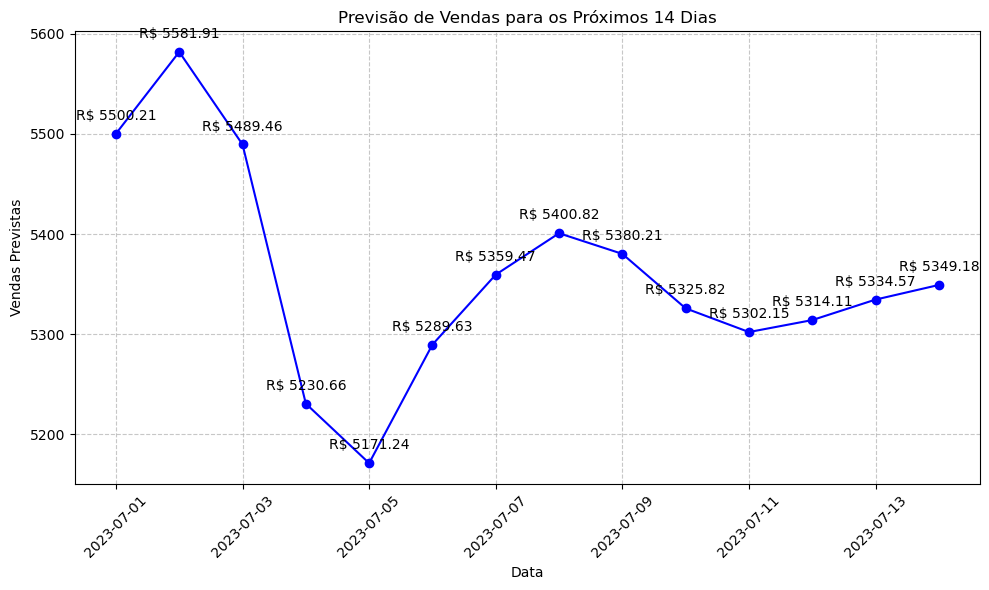

Previsão de vendas para os próximos 14 dias:
         Data Vendas Previstas
0  2023-07-01       R$ 5500.21
1  2023-07-02       R$ 5581.91
2  2023-07-03       R$ 5489.46
3  2023-07-04       R$ 5230.66
4  2023-07-05       R$ 5171.24
5  2023-07-06       R$ 5289.63
6  2023-07-07       R$ 5359.47
7  2023-07-08       R$ 5400.82
8  2023-07-09       R$ 5380.21
9  2023-07-10       R$ 5325.82
10 2023-07-11       R$ 5302.15
11 2023-07-12       R$ 5314.11
12 2023-07-13       R$ 5334.57
13 2023-07-14       R$ 5349.18


In [35]:
import matplotlib.pyplot as plt

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates_14d, forecast_14d, marker='o', color='blue', linestyle='-')
plt.title('Previsão de Vendas para os Próximos 14 Dias')
plt.xlabel('Data')
plt.ylabel('Vendas Previstas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar os valores previstos no gráfico
for i, txt in enumerate(forecast_14d_str):
    plt.annotate(txt, (forecast_dates_14d[i], forecast_14d[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Exibir o gráfico
plt.show()

# Fazer a previsão para os próximos 14 dias
forecast_14d = model_fit.forecast(steps=14)

# Converter as datas da previsão para o formato correto
forecast_dates_14d = pd.date_range(start='2023-07-01', periods=14)

# Arredondar os valores previstos para duas casas decimais
forecast_14d_rounded = forecast_14d.round(2)

# Converter os valores previstos para listas de strings formatadas
forecast_14d_str = [f'R$ {value:.2f}' for value in forecast_14d_rounded]

# Criar DataFrame com as datas e as vendas previstas formatadas
forecast_df_14d = pd.DataFrame({'Data': forecast_dates_14d, 'Vendas Previstas': forecast_14d_str})

# Exibir a previsão
print("Previsão de vendas para os próximos 14 dias:")
print(forecast_df_14d)


